In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models,layers
#import tensorflow_addons as tfa

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/ISIC_2019_Training_GroundTruth.csv')

#!unzip -u '/content/drive/MyDrive/ISIC_2019_Training_Input.zip' -d '/content/Train'
base_dir = '/content/Train/ISIC_2019_Training_Input'

In [ ]:
df_train = df.sample(frac=0.8)
df_val = df[~df['image'].isin(df_train.image.unique())]
print(len(df_train))
print(len(df_val))

20265
5066


In [ ]:
print(len(df_train[df_train['MEL']==1.0]))
print(len(df_train[df_train['NV']==1.0]))
print(len(df_train[df_train['BCC']==1.0]))
print(len(df_train[df_train['AK']==1.0]))
print(len(df_train[df_train['BKL']==1.0]))
print(len(df_train[df_train['DF']==1.0]))
print(len(df_train[df_train['VASC']==1.0]))
print(len(df_train[df_train['SCC']==1.0]))

3609
10289
2663
696
2119
193
203
493


In [ ]:
#newdf_train1 = pd.DataFrame(np.repeat(df_train[df_train['MEL']==1.0].values,3,axis=0))
newdf_train1 = df_train[df_train['MEL']==1].sample(len(df_train[df_train['DF']==1.0]), replace=False, random_state=1)
newdf_train1.columns = df_train.columns

#newdf_train2 = pd.DataFrame(np.repeat(df_train[df_train['NV']==1.0].values,1,axis=0))
newdf_train2 = df_train[df_train['NV']==1].sample(len(df_train[df_train['DF']==1.0]), replace=False, random_state=1)
newdf_train2.columns = df_train.columns

#newdf_train3 = pd.DataFrame(np.repeat(df_train[df_train['BCC']==1.0].values,4,axis=0))
newdf_train3 = df_train[df_train['BCC']==1].sample(len(df_train[df_train['DF']==1.0]), replace=False, random_state=1)
newdf_train3.columns = df_train.columns

#newdf_train4 = pd.DataFrame(np.repeat(df_train[df_train['AK']==1.0].values,15,axis=0))
newdf_train4 = df_train[df_train['AK']==1].sample(len(df_train[df_train['DF']==1.0]), replace=False, random_state=1)
newdf_train4.columns = df_train.columns

#newdf_train5 = pd.DataFrame(np.repeat(df_train[df_train['BKL']==1.0].values,5,axis=0))
newdf_train5 = df_train[df_train['BKL']==1].sample(len(df_train[df_train['DF']==1.0]), replace=False, random_state=1)
newdf_train5.columns = df_train.columns

#newdf_train6 = pd.DataFrame(np.repeat(df_train[df_train['DF']==1.0].values,56,axis=0))
newdf_train6 = df_train[df_train['DF']==1].sample(len(df_train[df_train['DF']==1.0]), replace=False, random_state=1)
newdf_train6.columns = df_train.columns

#newdf_train7 = pd.DataFrame(np.repeat(df_train[df_train['VASC']==1.0].values,52,axis=0))
newdf_train7 = df_train[df_train['VASC']==1].sample(len(df_train[df_train['DF']==1.0]), replace=False, random_state=1)
newdf_train7.columns = df_train.columns

#newdf_train8 = pd.DataFrame(np.repeat(df_train[df_train['SCC']==1.0].values,21,axis=0))
newdf_train8 = df_train[df_train['SCC']==1].sample(len(df_train[df_train['DF']==1.0]), replace=False, random_state=1)
newdf_train8.columns = df_train.columns
#print(df_train)

In [ ]:
newdf_train = pd.concat([newdf_train1,newdf_train2,newdf_train3,newdf_train4,newdf_train5,newdf_train6,newdf_train7,newdf_train8], ignore_index=True)
newdf_train.columns = df_train.columns

In [ ]:
print(len(newdf_train[newdf_train['MEL']==1]))
print(len(newdf_train[newdf_train['NV']==1]))
print(len(newdf_train[newdf_train['BCC']==1]))
print(len(newdf_train[newdf_train['AK']==1]))
print(len(newdf_train[newdf_train['BKL']==1]))
print(len(newdf_train[newdf_train['DF']==1]))
print(len(newdf_train[newdf_train['VASC']==1]))
print(len(newdf_train[newdf_train['SCC']==1]))

180
185
186
188
189
193
177
187


In [ ]:
newdf_train[["MEL", "NV","BCC","AK","BKL","DF","VASC","SCC","UNK"]] = newdf_train[["MEL", "NV","BCC","AK","BKL","DF","VASC","SCC","UNK"]].apply(pd.to_numeric)
newdf_train.dtypes

image     object
MEL      float64
NV       float64
BCC      float64
AK       float64
BKL      float64
DF       float64
VASC     float64
SCC      float64
UNK      float64
dtype: object

In [ ]:
newdf_train

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0031417,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0061606,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0013472_downsampled,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0054885,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0032187,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1480,ISIC_0025089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1481,ISIC_0063217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1482,ISIC_0057043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1483,ISIC_0065018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
def loadImage(image,mel,nv,bcc,ak,bkl,df,vasc,scc):
 image = tf.io.read_file(base_dir + '/' + image + '.jpg')
 image = tf.io.decode_jpeg(image,channels=3)
 image = tf.image.resize(image,size = (260,260)) #EfficientNetB2
 #image = tf.image.resize(image,size = (299,299))
 #image = image/255

 label = tf.stack([mel,nv,bcc,ak,bkl,df,vasc,scc])
 return image,label

def dataAument(image,label):
 image = tf.image.random_brightness(image,0.2)
 image = tf.image.random_flip_left_right(image)
 image = tf.image.random_flip_up_down(image)
 #image = tf.image.random_contrast(image,0.2,0.5)
 #image = tf.image.random_saturation(image,2,6)
 

 return image,label

In [ ]:
dataSet_train = tf.data.Dataset.from_tensor_slices((newdf_train['image'],
                                                    newdf_train['MEL'],
                                                    newdf_train['NV'],
                                                    newdf_train['BCC'],
                                                    newdf_train['AK'],
                                                    newdf_train['BKL'],
                                                    newdf_train['DF'],
                                                    newdf_train['VASC'],
                                                    newdf_train['SCC']))
dataSet_train = dataSet_train.shuffle(len(newdf_train))
dataSet_train = dataSet_train.map(loadImage)
dataSet_train = dataSet_train.map(dataAument)

dataSet_train = dataSet_train.batch(64)

In [ ]:
dataSet_val = tf.data.Dataset.from_tensor_slices((df_val['image'],
                                                    df_val['MEL'],
                                                    df_val['NV'],
                                                    df_val['BCC'],
                                                    df_val['AK'],
                                                    df_val['BKL'],
                                                    df_val['DF'],
                                                    df_val['VASC'],
                                                   df_val['SCC']))
dataSet_val = dataSet_val.map(loadImage)
dataSet_val = dataSet_val.batch(64)

In [ ]:
labels_vet = []
for image,labels in dataSet_val:
  labels_vet = list(tf.argmax(labels,axis=1).numpy()) + labels_vet

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 299, 299, 3)


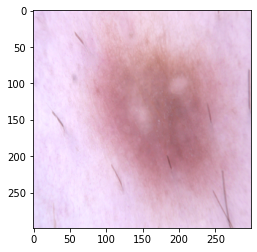

In [ ]:
for sample in dataSet_train.take(1):
  print(sample[0].shape)
  plt.imshow(sample[0][0])
  plt.show()

In [ ]:
len(dataSet_train)

24

In [ ]:
conv_base = EfficientNetB2(include_top=False,weights='imagenet',input_shape=(260,260,3))

#conv_base = InceptionV3(include_top=False,weights='imagenet',input_shape=(299,299,3))

conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
for layer in conv_base.layers:
  layer.trainable = True
  print(layer.name,layer.trainable)

input_1 True
conv2d True
batch_normalization True
activation True
conv2d_1 True
batch_normalization_1 True
activation_1 True
conv2d_2 True
batch_normalization_2 True
activation_2 True
max_pooling2d True
conv2d_3 True
batch_normalization_3 True
activation_3 True
conv2d_4 True
batch_normalization_4 True
activation_4 True
max_pooling2d_1 True
conv2d_8 True
batch_normalization_8 True
activation_8 True
conv2d_6 True
conv2d_9 True
batch_normalization_6 True
batch_normalization_9 True
activation_6 True
activation_9 True
average_pooling2d True
conv2d_5 True
conv2d_7 True
conv2d_10 True
conv2d_11 True
batch_normalization_5 True
batch_normalization_7 True
batch_normalization_10 True
batch_normalization_11 True
activation_5 True
activation_7 True
activation_10 True
activation_11 True
mixed0 True
conv2d_15 True
batch_normalization_15 True
activation_15 True
conv2d_13 True
conv2d_16 True
batch_normalization_13 True
batch_normalization_16 True
activation_13 True
activation_16 True
average_pooling2d_

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(8, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 16392     
Total params: 21,819,176
Trainable params: 21,784,744
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["acc"])

H = model.fit(dataSet_train,epochs=40,validation_data = dataSet_val)

Epoch 1/40
24/24 [==============================] - 77s 2s/step - loss: 1.6662 - acc: 0.3912 - val_loss: 15.1408 - val_acc: 0.0770
Epoch 2/40
24/24 [==============================] - 50s 2s/step - loss: 1.3419 - acc: 0.5394 - val_loss: 34.7092 - val_acc: 0.0099
Epoch 3/40
24/24 [==============================] - 50s 2s/step - loss: 1.1452 - acc: 0.5771 - val_loss: 2.7591 - val_acc: 0.1810
Epoch 4/40
24/24 [==============================] - 50s 2s/step - loss: 0.9801 - acc: 0.6465 - val_loss: 66.1808 - val_acc: 0.0099
Epoch 5/40
24/24 [==============================] - 60s 3s/step - loss: 0.9406 - acc: 0.6754 - val_loss: 7.2199 - val_acc: 0.1182
Epoch 6/40
24/24 [==============================] - 50s 2s/step - loss: 0.8957 - acc: 0.6842 - val_loss: 5.8244 - val_acc: 0.3358
Epoch 7/40
24/24 [==============================] - 60s 3s/step - loss: 0.8496 - acc: 0.6983 - val_loss: 4.3256 - val_acc: 0.2009
Epoch 8/40
24/24 [==============================] - 49s 2s/step - loss: 0.8642 - acc: 0

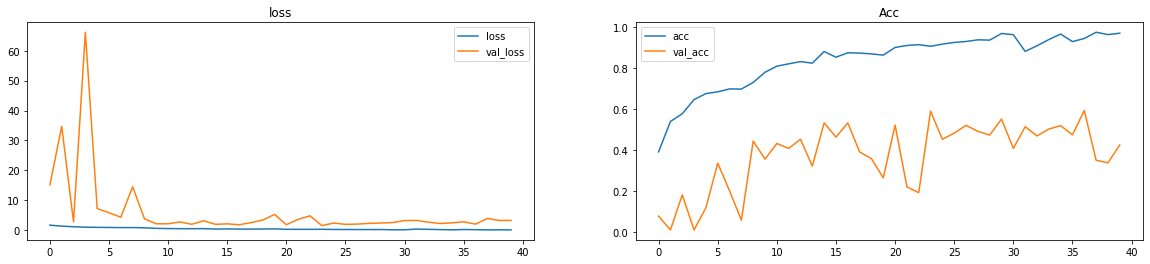

In [ ]:
def print_curva(H):
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    plt.plot(H.history['loss'], label='loss')
    plt.plot(H.history['val_loss'], label='val_loss')
    plt.legend()
    plt.title('loss')

    plt.subplot(1,2,2)
    plt.plot(H.history['acc'], label='acc')
    plt.plot(H.history['val_acc'], label='val_acc')
    plt.legend()
    plt.title('Acc')
    plt.show()

print_curva(H)

In [ ]:
predictions = tf.math.argmax(model.predict(dataSet_val),axis=1)
onf_matrix = tf.math.confusion_matrix(labels=labels_vet,predictions=predictions)
print(onf_matrix)

tf.Tensor(
[[324 233  49  15  48  27   9 208]
 [985 545 183  64 152  89  54 514]
 [226 201  16   7  47  14   7 142]
 [ 63  53   4   0  12   4   4  31]
 [171 109  44  19  32  20   5 105]
 [ 16   9   1   3   2   4   0  11]
 [ 18  12   2   1   2   2   2  11]
 [ 50  32  10   0   3   7   0  33]], shape=(8, 8), dtype=int32)
